In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# YahooFinance
import yfinance as yf
symbol = 'META'

df = yf.download(symbol, period="max", interval="1d")
df.to_csv("META.csv")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

meta = pd.read_csv("META.csv")
meta = meta[2:]
meta = meta.reset_index()
meta = meta.drop(columns=["index"])
# Rename 'Date' column in meta to 'Price', the original column name in the CSV.
meta = meta.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
meta.head()

meta[columns_to_convert] = meta[columns_to_convert].astype(float)
meta['Date'] = pd.to_datetime(meta['Date']) # Convert the 'Date' column to datetime
meta['Volume'] = meta['Volume'].astype(int)
# meta.head() # Uncomment to check the DataFrame structure

df = meta
# Now you can filter using the 'Date' column:
df = df[df['Date']>=pd.Timestamp(2020,1,1)].reset_index().drop(columns=["index"]) # Use pd.Timestamp
df = df[df['Date']<pd.Timestamp(2025,1,31)] # Use pd.Timestamp

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1277 entries, 0 to 1276
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1277 non-null   datetime64[ns]
 1   Close   1277 non-null   float64       
 2   High    1277 non-null   float64       
 3   Low     1277 non-null   float64       
 4   Open    1277 non-null   float64       
 5   Volume  1277 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 69.8 KB


In [6]:
df.isnull().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [7]:
# Rename columns
new_columns = {col: col.replace(' ', '_').replace('Price', 'Date').replace('Week_Date', 'Day') for col in df.columns}
df = df.rename(columns=new_columns)

In [8]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)

df = df.set_index('Date')

In [9]:
df

,Close,High,Low,Open,Volume,Tomorrow,Target
Date,,,,,,,
2020-01-02,208.795914,208.805861,205.302385,205.780129,12077100,207.691147,0
2020-01-03,207.691147,209.413027,205.979214,206.238004,11188400,211.602692,1
2020-01-06,211.602692,211.781840,205.551211,205.730360,17058900,212.060547,1
2020-01-07,212.060547,213.573421,210.756694,211.821682,14912400,214.210419,1
2020-01-08,214.210419,215.225638,211.612661,212.000831,13475000,217.275970,1
...,...,...,...,...,...,...,...
2025-01-24,646.914429,651.420429,633.636264,635.834321,19065300,659.293457,1
2025-01-27,659.293457,663.279901,624.544343,626.053010,28399200,673.730591,1
2025-01-28,673.730591,681.973257,658.883754,665.407978,20950100,675.888672,1


In [10]:
meta = df.loc["2000-01-01":].copy()
meta

,Close,High,Low,Open,Volume,Tomorrow,Target
Date,,,,,,,
2020-01-02,208.795914,208.805861,205.302385,205.780129,12077100,207.691147,0
2020-01-03,207.691147,209.413027,205.979214,206.238004,11188400,211.602692,1
2020-01-06,211.602692,211.781840,205.551211,205.730360,17058900,212.060547,1
2020-01-07,212.060547,213.573421,210.756694,211.821682,14912400,214.210419,1
2020-01-08,214.210419,215.225638,211.612661,212.000831,13475000,217.275970,1
...,...,...,...,...,...,...,...
2025-01-24,646.914429,651.420429,633.636264,635.834321,19065300,659.293457,1
2025-01-27,659.293457,663.279901,624.544343,626.053010,28399200,673.730591,1
2025-01-28,673.730591,681.973257,658.883754,665.407978,20950100,675.888672,1


In [11]:
meta.shape

(1277, 7)

In [12]:
meta.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0
Tomorrow,1
Target,0


In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Import the SVM Regressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
features = ['High', 'Low', 'Open', 'Volume']
target = "Close"  # Set target variable as "High"

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(meta, test_size=0.3, random_state=1, shuffle=False)

# Standardize the predictors (SVM performs better with scaled data)
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# Initialize the SVM model (SVR for regression)
svm_model = SVR(kernel="rbf", C=1.0, gamma="scale")

# Train the SVM model
svm_model.fit(train_scaled, train[target])

# Predict on training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)
train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

# Print results
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training Mean Squared Error: {train_mse:.4f}")
print(f"Testing Mean Squared Error: {test_mse:.4f}")


Training R-squared: 0.9243
Testing R-squared: -3.7478
Training Mean Squared Error: 376.8077
Testing Mean Squared Error: 56494.7751


##Performing Hyperparameter tuning

In [14]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Define features and target
features = ['High', 'Low', 'Open', 'Volume']  # Try adding SMA_50, EMA_50 later
target = 'Close'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(meta, test_size=0.2, random_state=1, shuffle=False)

# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# Adjusted hyperparameter grid to prevent overfitting
param_grid = {
    'C': [0.01, 0.1],  # Reduce regularization to avoid overfitting
    'epsilon': [0.1, 0.2],  # Increase epsilon to prevent capturing noise
    'gamma': ['scale'],  # Keep gamma 'scale' to avoid extreme non-linearity
    'kernel': ['linear']  # Linear kernel generalizes better
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on the training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


Best Parameters: {'C': 0.1, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'linear'}
Training R-squared: 0.9979
Testing R-squared: 0.9858
Training MSE: 10.6983
Testing MSE: 48.6915


##Performing Feature Importance to see what features play a vital role and which features have less impact on the model

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model for feature importance
rf = RandomForestRegressor()
rf.fit(train[features], train[target])

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance)


  Feature  Importance
1     Low    0.791606
0    High    0.195202
2    Open    0.012996
3  Volume    0.000196


In [16]:
# pip install ta

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

meta = pd.read_csv("META.csv")
meta = meta[2:]
meta = meta.reset_index()
meta = meta.drop(columns=["index"])
# Rename 'Date' column in meta to 'Price', the original column name in the CSV.
meta = meta.rename(columns={"Price":"Date"})
columns_to_convert = ["Close", "High", "Low", "Open"]
meta.head()

meta[columns_to_convert] = meta[columns_to_convert].astype(float)
meta['Date'] = pd.to_datetime(meta['Date']) # Convert the 'Date' column to datetime
meta['Volume'] = meta['Volume'].astype(int)
# meta.head() # Uncomment to check the DataFrame structure

df = meta
# Now you can filter using the 'Date' column:
df = df[df['Date']>=pd.Timestamp(2020,1,1)].reset_index().drop(columns=["index"]) # Use pd.Timestamp
df = df[df['Date']<pd.Timestamp(2025,1,31)] # Use pd.Timestamp

In [18]:
import pandas as pd
import numpy as np
import ta
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
# meta = pd.read_csv("/content/META.csv")

# Convert 'Date' to datetime and set it as index
# meta['Date'] = pd.to_datetime(meta['Date'])
# meta.set_index('Date', inplace=True) #Setting Date as the index

# Ensure data is sorted
meta = meta.sort_values("Date").reset_index(drop=True)

# Convert necessary columns to float
columns_to_convert = ["Close", "High", "Low", "Open"]
meta[columns_to_convert] = meta[columns_to_convert].astype(float)

# Add technical indicators
meta["SMA_50"] = ta.trend.sma_indicator(meta["Close"], window=50)
meta["EMA_50"] = ta.trend.ema_indicator(meta["Close"], window=50)
meta["RSI"] = ta.momentum.rsi(meta["Close"], window=14)
meta["MACD"] = ta.trend.macd(meta["Close"])

# Drop NaN values (first 50 rows will have NaNs due to SMA/EMA)
meta = meta.dropna().reset_index(drop=True)

# Define features and target
features = ['High', 'Low', 'Open', 'SMA_50', 'EMA_50', 'RSI', 'MACD']
target = 'Close'

# Split data into train (80%) and test (20%) - with shuffle enabled
train, test = train_test_split(meta, test_size=0.2, random_state=1, shuffle=True)

# Standardize features
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# Hyperparameter tuning for SVR
param_grid = {
    'C': [0.001, 0.005],  # Lower regularization to avoid overfitting
    'epsilon': [0.2, 0.3],  # Prevent capturing noise
    'gamma': ['scale', 'auto'],  # Experiment with gamma selection
    'kernel': ['rbf']  # RBF kernel for non-linear patterns
}

# GridSearchCV to find best parameters
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate evaluation metrics
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

# Print results
print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Best Parameters: {'C': 0.005, 'epsilon': 0.2, 'gamma': 'auto', 'kernel': 'rbf'}
Training R-squared: -0.0202
Testing R-squared: -0.0068
Training MSE: 21148.4327
Testing MSE: 19700.5786


In [19]:
import pandas as pd
import numpy as np
import ta
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define features and target
features = ['High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']  # Use existing SMA_50 and EMA_50
target = 'Close'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(meta, test_size=0.2, random_state=1, shuffle=False)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Define features and target
features = ['Close', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']  # Use existing SMA_50 and EMA_50
target = 'High'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(meta, test_size=0.2, random_state=1, shuffle=False)


# Apply SimpleImputer to handle missing values (only for features)
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean

# Impute missing values for training and testing features
train[features] = imputer.fit_transform(train[features])
test[features] = imputer.transform(test[features])

# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'epsilon': [0.1, 0.2],  # Epsilon in loss function
    'gamma': ['scale'],  # Gamma parameter (used in RBF kernel)
    'kernel': ['linear']  # Linear kernel (for simplicity)
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best hyperparameters from the GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on the training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")


# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'epsilon': [0.1, 0.2],  # Epsilon in loss function
    'gamma': ['scale'],  # Gamma parameter (used in RBF kernel)
    'kernel': ['linear']  # Linear kernel (for simplicity)
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best hyperparameters from the GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])

# Predict on the training and testing sets
train_preds = svm_model.predict(train_scaled)
test_preds = svm_model.predict(test_scaled)

# Calculate R-squared and Mean Squared Error (MSE)
train_r2 = r2_score(train[target], train_preds)
test_r2 = r2_score(test[target], test_preds)

train_mse = mean_squared_error(train[target], train_preds)
test_mse = mean_squared_error(test[target], test_preds)

print(f"Training R-squared: {train_r2:.4f}")
print(f"Testing R-squared: {test_r2:.4f}")
print(f"Training MSE: {train_mse:.4f}")
print(f"Testing MSE: {test_mse:.4f}")

Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training R-squared: 0.9994
Testing R-squared: 0.9988
Training MSE: 4.7446
Testing MSE: 37.1588
Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training R-squared: 0.9994
Testing R-squared: 0.9988
Training MSE: 4.7446
Testing MSE: 37.1588


#Forecasting stock price for next 30 days

Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

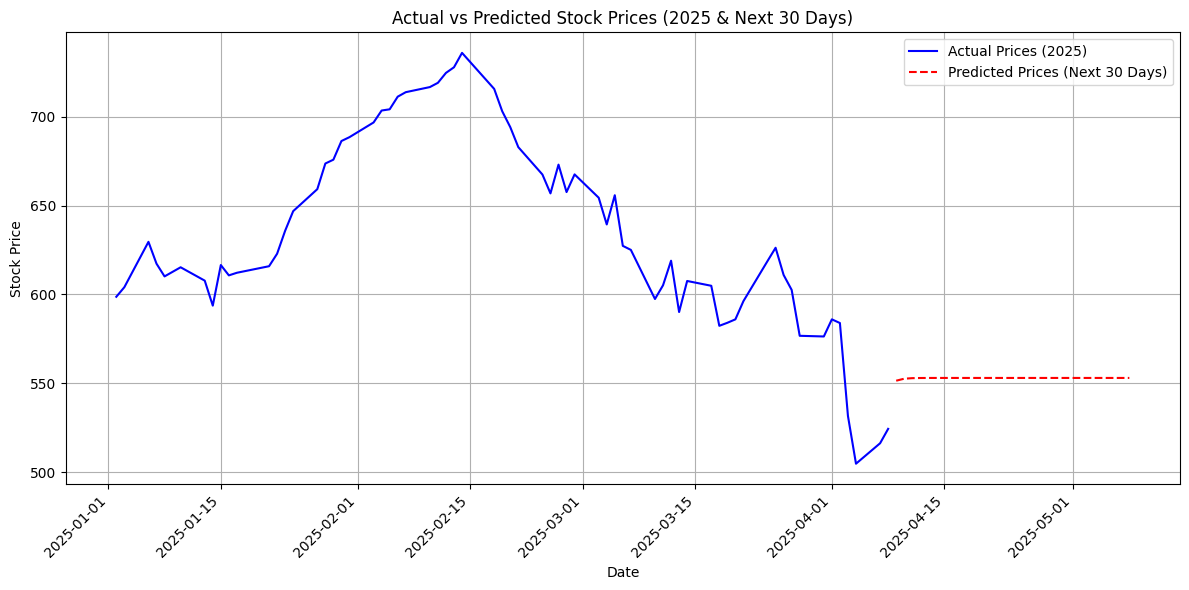

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Define features and target
features = ['High', 'Low', 'Open', 'Volume', 'SMA_50', 'EMA_50']  # Use existing SMA_50 and EMA_50
target = 'Close'

# Split the data into training (80%) and testing (20%) sets
train, test = train_test_split(meta, test_size=0.2, random_state=1, shuffle=False)

# Apply SimpleImputer to handle missing values (only for features)
imputer = SimpleImputer(strategy='mean')  # Fill missing values with the mean

# Impute missing values for training and testing features
train[features] = imputer.fit_transform(train[features])
test[features] = imputer.transform(test[features])

# Standardize the predictors
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[features])
test_scaled = scaler.transform(test[features])

# GridSearchCV for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1],  # Regularization parameter
    'epsilon': [0.1, 0.2],  # Epsilon in loss function
    'gamma': ['scale'],  # Gamma parameter (used in RBF kernel)
    'kernel': ['linear']  # Linear kernel (for simplicity)
}

# Perform GridSearchCV
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(train_scaled, train[target])

# Get the best hyperparameters from the GridSearch
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
svm_model = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'], epsilon=best_params['epsilon'])
svm_model.fit(train_scaled, train[target])


# Forecasting stock price for next 30 days
# Convert 'Date' index to datetime before filtering
test['Date'] = pd.to_datetime(test['Date'])  # Convert 'Date' column to datetime
# Now you can filter by year
test_2025 = test[test['Date'].dt.year == 2025]  # Filter for the year 2025

if test_2025.empty:
    print("No data available for 2025. Please check your dataset.")
    exit()

last_data_point_2025 = test_2025.iloc[-1][features].values.reshape(1, -1)# Convert 'Date' to datetime before filtering
test['Date'] = pd.to_datetime(test['Date'])  # Convert 'Date' column to datetime
# Now you can filter by year
test_2025 = test[test['Date'].dt.year == 2025]  # Filter for the year 2025

if test_2025.empty:
    print("No data available for 2025. Please check your dataset.")
    exit()

last_data_point_2025 = test_2025.iloc[-1][features].values.reshape(1, -1)
scaled_last_data_2025 = scaler.transform(last_data_point_2025)
future_preds = []
for _ in range(30):
    next_pred = svm_model.predict(scaled_last_data_2025)[0]
    future_preds.append(next_pred)

    # Shift the last data point with new prediction
    last_data_point_2025[0][0] = next_pred  # Updating 'Close' price for the next day
    scaled_last_data_2025 = scaler.transform(last_data_point_2025)

# Prepare future dates starting from the last date in 2025
last_date_2025 = test_2025['Date'].iloc[-1] # Get the last date as a Timestamp
future_dates = pd.date_range(start=last_date_2025 + pd.Timedelta(days=1), periods=30, freq='D')

plt.figure(figsize=(12, 6))
plt.plot(test_2025['Date'], test_2025[target], label="Actual Prices (2025)", color='blue')
plt.plot(future_dates, future_preds, label="Predicted Prices (Next 30 Days)", color='red', linestyle='dashed')

# Format x-axis using mdates functions
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) # Use AutoDateLocator for better tick placement
plt.xticks(rotation=45, ha='right') # Align x-axis labels to the right

plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices (2025 & Next 30 Days)")
plt.legend()
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()